# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install Pillow imageio

In [ ]:
import numpy as np
import os
from imageio import imread
from skimage import transform,io
import datetime
import glob
import random
import matplotlib.pyplot as plt
from PIL import Image


We set the random seed so that the results don't vary drastically.

In [ ]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [ ]:
train_doc = np.random.permutation(open('/home/datasets/Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('/home/datasets/Project_data/val.csv').readlines())
batch_size = 20

Below block is to try out different approaches to preprocess the image to bring all the images to same dimension.


*   First image(1,1) is the original
*   Second image(1,2) - Resize and crop
*   Thrid image(2,1) - Just padding without resize and crop
*   Forth image(2,2) - Padding and then resize and crop



In [ ]:
# select any image
np.random.permutation(train_doc)[0:2]

array(['WIN_20180926_17_24_58_Pro_Right_Swipe_new;Right_Swipe_new;1\n',
       'WIN_20180926_17_35_17_Pro_Stop_new;Stop_new;2\n'], dtype='<U88')

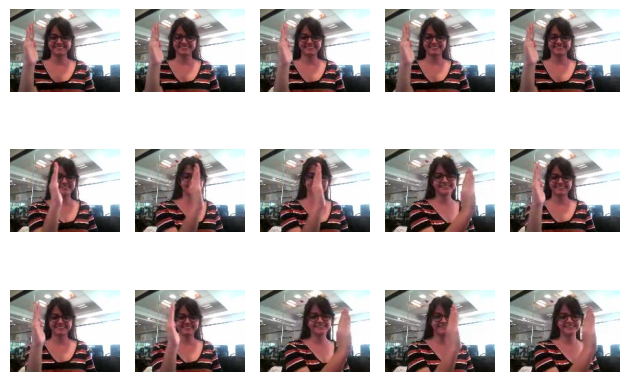

In [ ]:
t_path = os.path.join('/home/datasets/Project_data/','train','WIN_20180926_17_14_32_Pro_Left_Swipe_new','*')
t_path = glob.glob(t_path)

fig, axes = plt.subplots(nrows=3, ncols=5)
ax = axes.ravel()
indx = np.linspace(0, 29, 15 , dtype=int)
i = 0
for pic in indx:

  image = io.imread(t_path[pic])
  ax[i].imshow(image, cmap='gray')
  ax[i].axis("off")
  i = i + 1
plt.tight_layout()
plt.show()

(120, 160, 3)
new width and height are {a},{b} 133 100
(100, 100, 3)
20


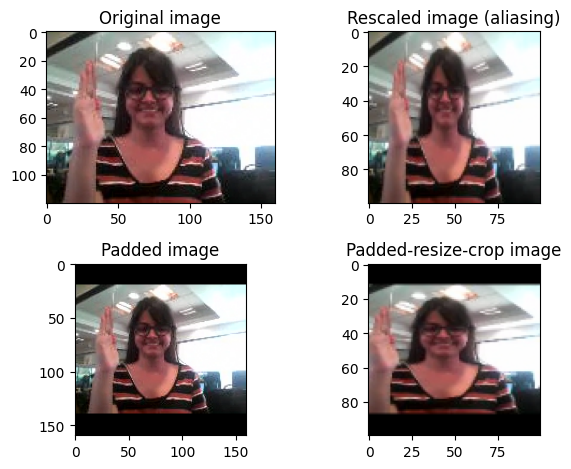

In [ ]:
t_path = os.path.join('/home/datasets/Project_data/','train','WIN_20180926_17_14_32_Pro_Left_Swipe_new','*')
# WIN_20180926_17_14_32_Pro_Left_Swipe_new/WIN_20180926_17_14_32_Pro_00001
# WIN_20180925_17_50_07_Pro_Thumbs_Down_new
t_path = glob.glob(t_path)
# image = io.imread('/content/drive/MyDrive/Gesture_Recognition/Project_data/val/WIN_20180907_16_13_24_Pro_Thumbs Down_new/WIN_20180907_16_13_24_Pro_00018.png')
image = io.imread('/home/datasets/Project_data/train/WIN_20180926_17_14_32_Pro_Left_Swipe_new/WIN_20180926_17_14_32_Pro_00001.png')
print(image.shape)

target_size = (100,100)
width, height = image.shape[1], image.shape[0]
aspect_ratio = width / height

if width > height:
    new_height = target_size[0]
    new_width = int(new_height * aspect_ratio)
    print('new width and height are {a},{b}' ,new_width,new_height)
else:
    new_height = target_size[1]
    new_width = int(new_height * aspect_ratio)

# Resize the image while preserving the aspect ratio
resized_image = transform.resize(image, target_size, anti_aliasing=True)

# Perform cropping to the target size
crop_x = max(new_width - target_size[0], 0) // 2
crop_y = max(new_height - target_size[1], 0) // 2
cropped_image = resized_image[crop_y:crop_y + target_size[1], crop_x:crop_x + target_size[0]]
print(resized_image.shape)
## Padding-resize-crop
pad_w = 0
pad_h = 0
if width < height:
  difference = np.absolute(width-height)
  pad_w = difference//2
  pad_h = 0

elif height < width:
  difference = np.absolute(width-height)
  pad_h = difference//2
  pad_w = 0
  print(pad_h)

padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w), (0, 0)), mode='constant')
new_height = target_size[1]
new_width = int(new_height * aspect_ratio)
resized_pad_image = transform.resize(padded_image, (new_height, new_width), anti_aliasing=True)
crop_x = max(new_width - target_size[0], 0) // 2
crop_y = max(new_height - target_size[1], 0) // 2
cropped_pad_image = resized_pad_image[crop_y:crop_y + target_size[1], crop_x:crop_x + target_size[0]]


fig, axes = plt.subplots(nrows=2, ncols=2)
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(resized_image, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(padded_image, cmap='gray')
ax[2].set_title("Padded image")

ax[3].imshow(cropped_pad_image, cmap='gray')
ax[3].set_title("Padded-resize-crop image")


plt.tight_layout()
plt.show()


Normal resize and crop give a better image compared to a padded one.

In [ ]:
t = np.random.permutation(train_doc)
print(t[0])
os.listdir('/home/datasets/Project_data/train'+'/'+ t[1 + (1*20)].split(';')[0])

WIN_20180925_17_55_45_Pro_Thumbs_Down_new;Thumbs_Down_new;3



['WIN_20180926_17_47_06_Pro_00038.png',
 'WIN_20180926_17_47_06_Pro_00039.png',
 'WIN_20180926_17_47_06_Pro_00040.png',
 'WIN_20180926_17_47_06_Pro_00041.png',
 'WIN_20180926_17_47_06_Pro_00042.png',
 'WIN_20180926_17_47_06_Pro_00043.png',
 'WIN_20180926_17_47_06_Pro_00014.png',
 'WIN_20180926_17_47_06_Pro_00015.png',
 'WIN_20180926_17_47_06_Pro_00016.png',
 'WIN_20180926_17_47_06_Pro_00017.png',
 'WIN_20180926_17_47_06_Pro_00018.png',
 'WIN_20180926_17_47_06_Pro_00019.png',
 'WIN_20180926_17_47_06_Pro_00020.png',
 'WIN_20180926_17_47_06_Pro_00021.png',
 'WIN_20180926_17_47_06_Pro_00022.png',
 'WIN_20180926_17_47_06_Pro_00023.png',
 'WIN_20180926_17_47_06_Pro_00024.png',
 'WIN_20180926_17_47_06_Pro_00025.png',
 'WIN_20180926_17_47_06_Pro_00026.png',
 'WIN_20180926_17_47_06_Pro_00027.png',
 'WIN_20180926_17_47_06_Pro_00028.png',
 'WIN_20180926_17_47_06_Pro_00029.png',
 'WIN_20180926_17_47_06_Pro_00030.png',
 'WIN_20180926_17_47_06_Pro_00031.png',
 'WIN_20180926_17_47_06_Pro_00032.png',


## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [ ]:
def generator(source_path, folder_list, batch_size, img_idx, height = 100, weight = 100):
    print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = img_idx
    while True:
        t = np.random.permutation(folder_list)
        num_batches = len(folder_list)//batch_size
        target_size = (height,weight)
        for batch in range(num_batches): # we iterate over the number of batches
            # print('#main batch:{0}'.format(batch) )
            batch_data = np.zeros((batch_size,len(img_idx),target_size[0],target_size[1],3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size

                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)].split(';')[0]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in

                    image = imread(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
                    #crop the images and resize them. Note that the images are of 2 different shape
                    # Get the image size ans aspect ratio

                    # Resize the image while preserving the aspect ratio
                    resized_image = transform.resize(image, target_size, anti_aliasing=True)

                    if(not (resized_image.shape[0] == target_size[0] and (resized_image.shape[1] == target_size[1])) ):
                      print(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item])
                      print(resized_image.shape)

                    batch_data[folder,idx,:,:,0] = resized_image[:,:,0]/255
                    batch_data[folder,idx,:,:,1] = resized_image[:,:,1]/255
                    batch_data[folder,idx,:,:,2] = resized_image[:,:,2]/255

                batch_labels[folder, int(t[folder + (batch*batch_size)].strip().split(';')[2])] = 1
            # print('#completed main batch:{0}'.format(batch))
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do


        # write the code for the remaining data points which are left after full batches
        remaining_data = len(folder_list)%batch_size
        if remaining_data != 0:
          # print('#Handing remining records')
          batch_data = np.zeros((remaining_data,len(img_idx),target_size[0],target_size[1],3))
          batch_labels = np.zeros((remaining_data,5))
          for folder in range(remaining_data):
            # print('#remaining folder:{0}'.format(folder) )
            imgs = os.listdir(source_path+'/'+ t[folder + (num_batches*batch_size)].split(';')[0])
            for idx,item in enumerate(img_idx): #
              image = imread(source_path+'/'+ t[folder + (num_batches*batch_size)].strip().split(';')[0]+'/'+imgs[item]).astype(np.float32)
              #crop the images and resize them. Note that the images are of 2 different shape
              # Get the image size ans aspect ratio
              # Resize the image while preserving the aspect ratio

              resized_image = transform.resize(image, target_size, anti_aliasing=True)

              if(not (resized_image.shape[0] == target_size[0] and (resized_image.shape[1] == target_size[1])) ):
                  print(source_path+'/'+ t[folder + (batch*batch_size)].strip().split(';')[0]+'/'+imgs[item])
                  print(resized_image.shape)

              batch_data[folder,idx,:,:,0] = resized_image[:,:,0]/255
              batch_data[folder,idx,:,:,1] = resized_image[:,:,1]/255
              batch_data[folder,idx,:,:,2] = resized_image[:,:,2]/255

            batch_labels[folder, int(t[folder + (num_batches*batch_size)].strip().split(';')[2])] = 1
          # print('#completed remaining batch.')
          yield batch_data, batch_labels

Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [ ]:
curr_dt_time = datetime.datetime.now()
train_path = '/home/datasets/Project_data/train'
val_path = '/home/datasets/Project_data/val'
num_train_sequences = len(train_doc)
print('# training sequences =', num_train_sequences)
num_val_sequences = len(val_doc)
print('# validation sequences =', num_val_sequences)
num_epochs = 20
print ('# epochs =', num_epochs)

# training sequences = 663
# validation sequences = 100
# epochs = 20


## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense,Dropout, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import gradient_descent_v2 as gd

import warnings
warnings.filterwarnings('ignore')


In [ ]:
def conv3D_template_1(num_frames=15, height = 100, weight= 100, drop_out= 0.15,conv_kernal=(16,32,64,128) ):
  model = Sequential()

  model.add(Conv3D(conv_kernal[0],(3,3,3),activation='relu',padding= 'same', input_shape=(num_frames,height,weight,3)))

  model.add(Conv3D(conv_kernal[1],(3,3,3),padding= 'same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))

  model.add(Conv3D(conv_kernal[2],(3,3,3),padding= 'same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(Dropout(drop_out))

  model.add(Conv3D(conv_kernal[3],(3,3,3),padding= 'same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))


  model.add(Flatten())

  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(drop_out))

  model.add(Dense(128, activation='relu'))

  model.add(Dense(5, activation='softmax'))

  return model





In [ ]:
def conv3D_template_2(num_frames=15, height = 100, weight= 100, drop_out= 0.15,conv_kernal=(16,32,64,64,128) ):
  model = Sequential()

  model.add(Conv3D(conv_kernal[0],(3,3,3),activation='relu',padding= 'same', input_shape=(num_frames,height,weight,3)))

  model.add(Conv3D(conv_kernal[1],(3,3,3),padding= 'same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))

  model.add(Conv3D(conv_kernal[2],(3,3,3),padding= 'same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(Dropout(drop_out))

  model.add(Conv3D(conv_kernal[3],(3,3,3),padding= 'same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))

  model.add(Conv3D(conv_kernal[4],(3,3,3),padding= 'same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(drop_out))

  model.add(Dense(128, activation='relu'))

  model.add(Dense(5, activation='softmax'))

  return model

In [ ]:
def conv3D_template_3(num_frames=15, height = 100, weight= 100, drop_out= 0.15,conv_kernal=(32,64,128,256) ):
  model = Sequential()

  model.add(Conv3D(conv_kernal[0],(3,3,3),activation='relu',padding= 'same', input_shape=(num_frames,height,weight,3)))

  model.add(Conv3D(conv_kernal[1],(3,3,3),padding= 'same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))
  model.add(Dropout(drop_out))

  model.add(Conv3D(conv_kernal[2],(3,3,3),padding= 'same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))

  model.add(Conv3D(conv_kernal[3],(3,3,3),padding= 'same',activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling3D(pool_size=(2, 2, 2)))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(drop_out))

  model.add(Dense(128, activation='relu'))

  model.add(Dense(5, activation='softmax'))

  return model

In [ ]:
def model_callbacks(modelname):
  model_name = modelname + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'

  if not os.path.exists(model_name):
      os.mkdir(model_name)

  filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'

  checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)

  LR = ReduceLROnPlateau(monitor='val_loss',patience=5,factor=0.2,min_lr=0.001)
  callbacks_list = [checkpoint, LR]
  return callbacks_list

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [ ]:
def model_step(batch_size, num_train_sequences, num_val_sequences ):
  if (num_train_sequences%batch_size) == 0:
      steps_per_epoch = int(num_train_sequences/batch_size)
  else:
      steps_per_epoch = (num_train_sequences//batch_size) + 1

  if (num_val_sequences%batch_size) == 0:
      validation_steps = int(num_val_sequences/batch_size)
  else:
      validation_steps = (num_val_sequences//batch_size) + 1
  return steps_per_epoch,validation_steps

In [ ]:
def plot_loss_accuracy(output):

    print(output.history.keys())

    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()


    # summarize history for accuracy
    ax[0].plot(output.history['categorical_accuracy'])
    ax[0].plot(output.history['val_categorical_accuracy'])
    ax[0].set_title('model accuracy')
    ax[0].set_ylabel('accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].legend(['train', 'test'], loc='upper left')

    # summarize history for loss
    ax[1].plot(output.history['loss'])
    ax[1].plot(output.history['val_loss'])
    ax[1].set_title('model loss')
    ax[1].set_ylabel('loss')
    ax[1].set_xlabel('epoch')
    ax[1].legend(['train', 'test'], loc='upper left')
    plt.tight_layout()
    plt.show()

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

# **Model-1** with Conv3D
 * conv3D_template_1
 * frame size=10,
 * image dimensions (100*100)  
 * kernal filters [16,32,64,128]
 * dropout = 0.15
 * epoch = 20
 * batch size = 20

In [ ]:
# num_frames = 10
# img_idx = np.linspace(0, 29, num_frames , dtype=int)
# num_epochs = 20
# batch_size = 20

# model3D_1 = conv3D_template_1(num_frames=num_frames, height=100, weight=100, drop_out =0.15, conv_kernal = (16, 32, 64, 128))

# train_generator = generator(train_path, train_doc, batch_size,img_idx,height=100,weight=100)
# val_generator = generator(val_path, val_doc, batch_size,img_idx,height=100,weight=100)

In [ ]:
# optimiser = SGD(learning_rate=0.01)
# model3D_1.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# print (model3D_1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 10, 100, 100, 16   1312      
                             )                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 10, 100, 100, 32   13856     
                             )                                   
                                                                 
 batch_normalization (Batch  (None, 10, 100, 100, 32   128       
 Normalization)              )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 5, 50, 50, 32)     0         
 D)                                                              
                                                                 
 conv3d_2 (Conv3D)           (None, 5, 50, 50, 64)     5

Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [ ]:
# callbacks_list = model_callbacks('model3D_1')
# steps_per_epoch,validation_steps = model_step(batch_size,num_train_sequences, num_val_sequences)

# model3D_1_output = model3D_1.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
#                    callbacks=callbacks_list, validation_data=val_generator,
#                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /content/drive/MyDrive/Gesture_Recognition/Project_data/train ; batch size = 20
Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 1.4564 - categorical_accuracy: 0.3891  Source path =  /content/drive/MyDrive/Gesture_Recognition/Project_data/val ; batch size = 20

Epoch 1: saving model to model3D_1_2023-11-0508_23_31.246004/model-00001-1.45642-0.38914-3.90093-0.19000.h5
34/34 [==============================] - 2646s 80s/step - loss: 1.4564 - categorical_accuracy: 0.3891 - val_loss: 3.9009 - val_categorical_accuracy: 0.1900 - lr: 0.0100
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 1.0465 - categorical_accuracy: 0.5837 
Epoch 2: saving model to model3D_1_2023-11-0508_23_31.246004/model-00002-1.04648-0.58371-2.36028-0.17000.h5
34/34 [==============================] - 781s 23s/step - loss: 1.0465 - categorical_accuracy: 0.5837 - val_loss: 2.3603 - val_categorical_accuracy: 0.1700 - lr: 0.0100
Epoch 3/20
34/34 [==========================

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


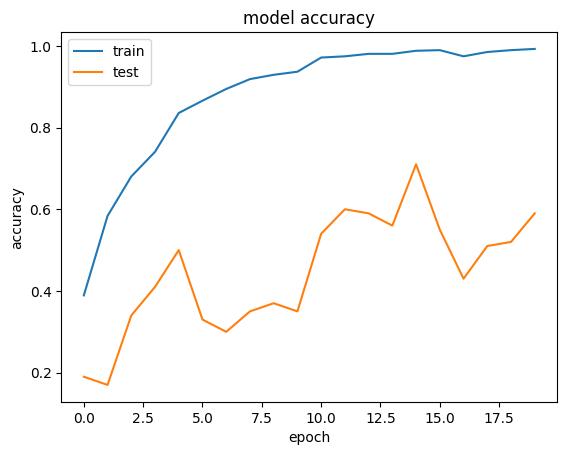

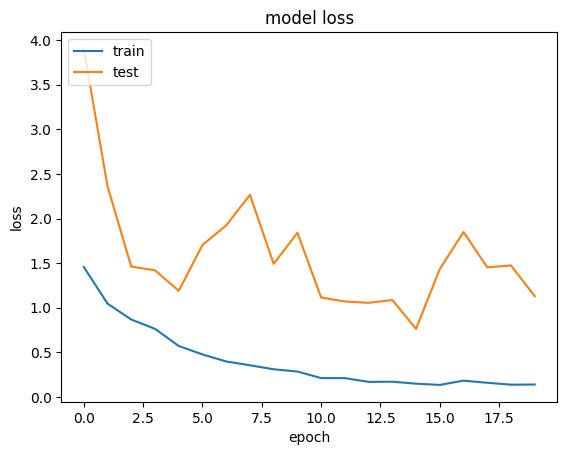

In [ ]:
# plot_loss_accuracy(model3D_1_output)

# **Model-2** with Conv3D
 * conv3D_template_1
 * frame size=15,
 * image dimensions (100*100)  
 * kernal filters [16,32,64,128]
 * dropout = 0.15
 * epoch = 20
 * batch size = 20

In [ ]:
# num_frames = 15
# img_idx = np.linspace(0, 29, num_frames , dtype=int)
# num_epochs = 20
# batch_size = 20

# model3D_2 = conv3D_template_1(num_frames=num_frames, height=100, weight=100, drop_out =0.15, conv_kernal = (16, 32, 64, 128))

# optimiser = SGD(learning_rate=0.01)
# model3D_2.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# print (model3D_2.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 15, 100, 100, 16   1312      
                             )                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 15, 100, 100, 32   13856     
                             )                                   
                                                                 
 batch_normalization (Batch  (None, 15, 100, 100, 32   128       
 Normalization)              )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 7, 50, 50, 32)     0         
 D)                                                              
                                                                 
 conv3d_2 (Conv3D)           (None, 7, 50, 50, 64)     5

In [ ]:
# train_generator = generator(train_path, train_doc, batch_size,img_idx,height=100,weight=100)
# val_generator = generator(val_path, val_doc, batch_size,img_idx,height=100,weight=100)

# callbacks_list = model_callbacks('model3D_2')
# steps_per_epoch,validation_steps = model_step(batch_size,num_train_sequences, num_val_sequences)

# model3D_2_output = model3D_2.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
#                    callbacks=callbacks_list, validation_data=val_generator,
#                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /content/drive/MyDrive/Gesture_Recognition/Project_data/train ; batch size = 20
Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 1.3865 - categorical_accuracy: 0.4148  Source path =  /content/drive/MyDrive/Gesture_Recognition/Project_data/val ; batch size = 20

Epoch 1: saving model to model3D_2_2023-11-0521_26_38.469852/model-00001-1.38651-0.41478-1.89704-0.16000.h5
34/34 [==============================] - 3704s 112s/step - loss: 1.3865 - categorical_accuracy: 0.4148 - val_loss: 1.8970 - val_categorical_accuracy: 0.1600 - lr: 0.0100
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 0.9752 - categorical_accuracy: 0.6109
Epoch 2: saving model to model3D_2_2023-11-0521_26_38.469852/model-00002-0.97523-0.61086-1.56100-0.27000.h5
34/34 [==============================] - 130s 4s/step - loss: 0.9752 - categorical_accuracy: 0.6109 - val_loss: 1.5610 - val_categorical_accuracy: 0.2700 - lr: 0.0100
Epoch 3/20
34/34 [===========================

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


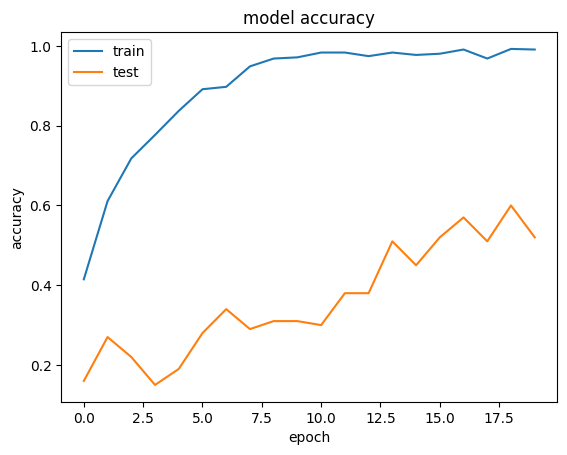

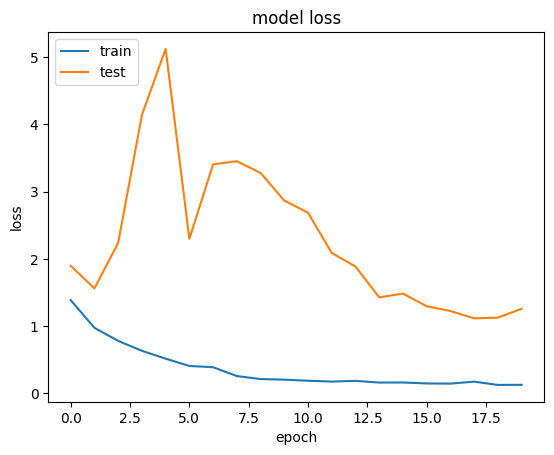

In [ ]:
plot_loss_accuracy(model3D_2_output)

# **Model-3** with Conv3D
* conv3D_template_1
* frame size=15,
* image dimensions (120*120)
* kernal filters [16,32,64,128]
* dropout = 0.15
* epoch = 20
* batch size = 20

In [ ]:
# num_frames = 15
# img_idx = np.linspace(0, 29, num_frames , dtype=int)
# num_epochs = 20
# batch_size = 20
# height=120
# weight=120

# model3D_3 = conv3D_template_1(num_frames=num_frames, height=height, weight=weight, drop_out =0.15, conv_kernal = (16, 32, 64, 128))

# optimiser = SGD(learning_rate=0.01)
# model3D_3.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
# print (model3D_3.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 15, 120, 120, 16   1312      
                             )                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 15, 120, 120, 32   13856     
                             )                                   
                                                                 
 batch_normalization (Batch  (None, 15, 120, 120, 32   128       
 Normalization)              )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 7, 60, 60, 32)     0         
 D)                                                              
                                                                 
 conv3d_2 (Conv3D)           (None, 7, 60, 60, 64)     5

In [ ]:
# train_generator = generator(train_path, train_doc, batch_size,img_idx,height=120,weight=120)
# val_generator = generator(val_path, val_doc, batch_size,img_idx,height=120,weight=120)

# callbacks_list = model_callbacks('model3D_3')
# steps_per_epoch,validation_steps = model_step(batch_size,num_train_sequences, num_val_sequences)

# model3D_3_output = model3D_3.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
#                    callbacks=callbacks_list, validation_data=val_generator,
#                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /content/drive/MyDrive/Gesture_Recognition/Project_data/train ; batch size = 20
Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 1.3703 - categorical_accuracy: 0.4208  Source path =  /content/drive/MyDrive/Gesture_Recognition/Project_data/val ; batch size = 20

Epoch 1: saving model to model3D_3_2023-11-0608_28_41.008983/model-00001-1.37026-0.42081-1.58564-0.27000.h5
34/34 [==============================] - 8368s 253s/step - loss: 1.3703 - categorical_accuracy: 0.4208 - val_loss: 1.5856 - val_categorical_accuracy: 0.2700 - lr: 0.0100
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 0.9129 - categorical_accuracy: 0.6621
Epoch 2: saving model to model3D_3_2023-11-0608_28_41.008983/model-00002-0.91294-0.66214-2.67759-0.17000.h5
34/34 [==============================] - 134s 4s/step - loss: 0.9129 - categorical_accuracy: 0.6621 - val_loss: 2.6776 - val_categorical_accuracy: 0.1700 - lr: 0.0100
Epoch 3/20
34/34 [===========================

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


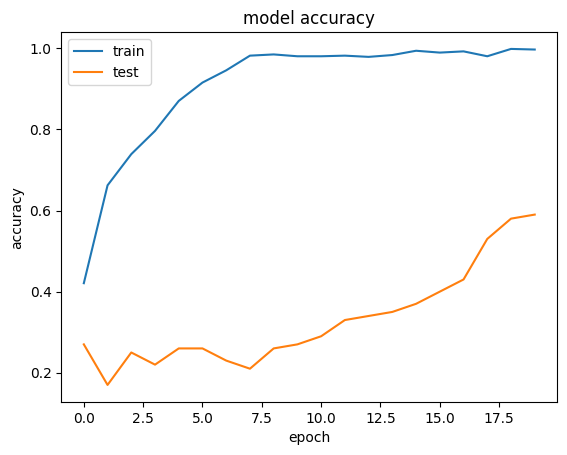

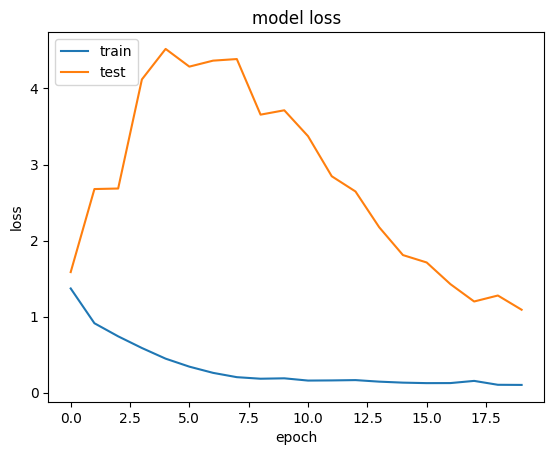

In [ ]:
# plot_loss_accuracy(model3D_3_output)

# **Model-4** with Conv3D
* conv3D_template_2
* frame size=20,
* image dimensions (120*120)
* kernal filters [16,32,64,64,128]
* dropout = 0.15
* epoch = 20
* batch size = 20

In [ ]:
num_frames = 20
img_idx = np.linspace(0, 29, num_frames , dtype=int)
num_epochs = 20
batch_size = 20
height=120
weight=120

model3D_4 = conv3D_template_2(num_frames=num_frames, height=height, weight=weight, drop_out =0.15, conv_kernal = (16, 32, 64, 64, 128))

optimiser = SGD(learning_rate=0.01)
model3D_4.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model3D_4.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 20, 120, 120, 16   1312      
                             )                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 20, 120, 120, 32   13856     
                             )                                   
                                                                 
 batch_normalization (Batch  (None, 20, 120, 120, 32   128       
 Normalization)              )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 10, 60, 60, 32)    0         
 D)                                                              
                                                                 
 conv3d_2 (Conv3D)           (None, 10, 60, 60, 64)    5

In [ ]:
train_generator = generator(train_path, train_doc, batch_size,img_idx,height=120,weight=120)
val_generator = generator(val_path, val_doc, batch_size,img_idx,height=120,weight=120)

callbacks_list = model_callbacks('model3D_4')
steps_per_epoch,validation_steps = model_step(batch_size,num_train_sequences, num_val_sequences)

model3D_4_output = model3D_4.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                   callbacks=callbacks_list, validation_data=val_generator,
                   validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /content/drive/MyDrive/Gesture_Recognition/Project_data/train ; batch size = 20
Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 1.5289 - categorical_accuracy: 0.3756  Source path =  /content/drive/MyDrive/Gesture_Recognition/Project_data/val ; batch size = 20

Epoch 1: saving model to model3D_4_2023-11-0618_59_43.478838/model-00001-1.52887-0.37557-9.39302-0.18000.h5
34/34 [==============================] - 5295s 160s/step - loss: 1.5289 - categorical_accuracy: 0.3756 - val_loss: 9.3930 - val_categorical_accuracy: 0.1800 - lr: 0.0100
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 1.0893 - categorical_accuracy: 0.5460
Epoch 2: saving model to model3D_4_2023-11-0618_59_43.478838/model-00002-1.08928-0.54600-2.27355-0.19000.h5
34/34 [==============================] - 164s 5s/step - loss: 1.0893 - categorical_accuracy: 0.5460 - val_loss: 2.2736 - val_categorical_accuracy: 0.1900 - lr: 0.0100
Epoch 3/20
34/34 [===========================

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


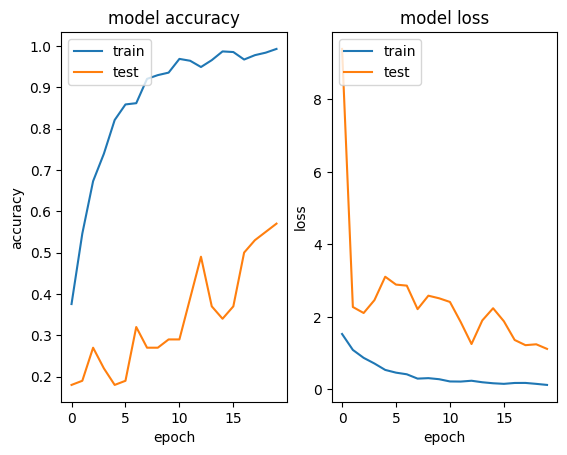

In [ ]:
plot_loss_accuracy(model3D_4_output)

# **Model-5** with Conv3D
* conv3D_template_2
* frame size=15,
* image dimensions (160*160)
* kernal filters [16,32,64,128]
* dropout = 0.15
* epoch = 20
* batch size = 20

In [ ]:
num_frames = 20
img_idx = np.linspace(0, 29, num_frames , dtype=int)
num_epochs = 20
batch_size = 20
height=160
weight=160

model3D_5 = conv3D_template_2(num_frames=num_frames, height=height, weight=weight, drop_out =0.15, conv_kernal = (16, 32, 64, 64, 128))

optimiser = gd.SGD(learning_rate=0.01)
model3D_5.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model3D_5.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 20, 160, 160, 16)  1312      
                                                                 
 conv3d_1 (Conv3D)           (None, 20, 160, 160, 32)  13856     
                                                                 
 batch_normalization (BatchN  (None, 20, 160, 160, 32)  128      
 ormalization)                                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 80, 80, 32)   0         
 )                                                               
                                                                 
 conv3d_2 (Conv3D)           (None, 10, 80, 80, 64)    55360     
                                                                 
 batch_normalization_1 (Batc  (None, 10, 80, 80, 64)   2

2023-11-07 10:29:44.787674: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-11-07 10:29:44.787758: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14802 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:1e:00.0, compute capability: 7.5


In [ ]:
train_generator = generator(train_path, train_doc, batch_size,img_idx,height=height,weight=weight)
val_generator = generator(val_path, val_doc, batch_size,img_idx,height=height,weight=weight)

callbacks_list = model_callbacks('model3D_5')
steps_per_epoch,validation_steps = model_step(batch_size,num_train_sequences, num_val_sequences)

model3D_5_output = model3D_5.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                   callbacks=callbacks_list, validation_data=val_generator,
                   validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/datasets/Project_data/train ; batch size = 20
Epoch 1/20


2023-11-07 10:29:59.585943: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


34/34 [==============================] - ETA: 0s - loss: 1.4672 - categorical_accuracy: 0.4193Source path =  /home/datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model3D_5_2023-11-0710_28_31.316668/model-00001-1.46721-0.41931-1.75339-0.23000.h5
34/34 [==============================] - 129s 4s/step - loss: 1.4672 - categorical_accuracy: 0.4193 - val_loss: 1.7534 - val_categorical_accuracy: 0.2300 - lr: 0.0100
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 1.0416 - categorical_accuracy: 0.5701
Epoch 00002: saving model to model3D_5_2023-11-0710_28_31.316668/model-00002-1.04163-0.57014-1.71915-0.31000.h5
34/34 [==============================] - 122s 4s/step - loss: 1.0416 - categorical_accuracy: 0.5701 - val_loss: 1.7192 - val_categorical_accuracy: 0.3100 - lr: 0.0100
Epoch 3/20
34/34 [==============================] - ETA: 0s - loss: 0.6901 - categorical_accuracy: 0.7421
Epoch 00003: saving model to model3D_5_2023-11-0710_28_31.316668/model

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


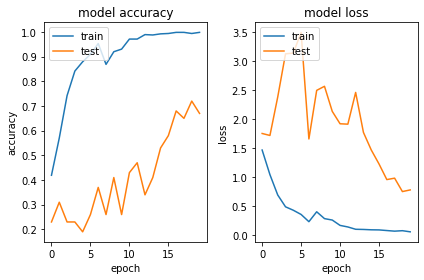

In [ ]:
plot_loss_accuracy(model3D_5_output)

# **Model-6** with Conv3D
* conv3D_template_2
* frame size=25,
* image dimensions (100*100)
* kernal filters [16,32,64,64,128]
* dropout = 0.15
* epoch = 20
* batch size = 20

In [ ]:
num_frames = 25
img_idx = np.linspace(0, 29, num_frames , dtype=int)
num_epochs = 20
batch_size = 20
height=100
weight=100

model3D_6 = conv3D_template_2(num_frames=num_frames, height=height, weight=weight, drop_out =0.15, conv_kernal = (16, 32, 64, 64, 128))

optimiser = gd.SGD(learning_rate=0.01)
model3D_6.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model3D_6.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 25, 100, 100, 16)  1312      
                                                                 
 conv3d_1 (Conv3D)           (None, 25, 100, 100, 32)  13856     
                                                                 
 batch_normalization (BatchN  (None, 25, 100, 100, 32)  128      
 ormalization)                                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 12, 50, 50, 32)   0         
 )                                                               
                                                                 
 conv3d_2 (Conv3D)           (None, 12, 50, 50, 64)    55360     
                                                                 
 batch_normalization_1 (Batc  (None, 12, 50, 50, 64)   2

2023-11-07 11:25:23.699707: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-11-07 11:25:23.699787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14802 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:1e:00.0, compute capability: 7.5


In [ ]:
train_generator = generator(train_path, train_doc, batch_size,img_idx,height=height,weight=weight)
val_generator = generator(val_path, val_doc, batch_size,img_idx,height=height,weight=weight)

callbacks_list = model_callbacks('model3D_6')
steps_per_epoch,validation_steps = model_step(batch_size,num_train_sequences, num_val_sequences)

model3D_6_output = model3D_6.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                   callbacks=callbacks_list, validation_data=val_generator,
                   validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/datasets/Project_data/train ; batch size = 20
Epoch 1/20


2023-11-07 11:25:44.755707: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


34/34 [==============================] - ETA: 0s - loss: 1.5162 - categorical_accuracy: 0.3424Source path =  /home/datasets/Project_data/val ; batch size = 20

Epoch 00001: saving model to model3D_6_2023-11-0711_20_04.194952/model-00001-1.51623-0.34238-2.98220-0.17000.h5
34/34 [==============================] - 133s 4s/step - loss: 1.5162 - categorical_accuracy: 0.3424 - val_loss: 2.9822 - val_categorical_accuracy: 0.1700 - lr: 0.0100
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 1.0241 - categorical_accuracy: 0.5852
Epoch 00002: saving model to model3D_6_2023-11-0711_20_04.194952/model-00002-1.02410-0.58522-1.66698-0.26000.h5
34/34 [==============================] - 130s 4s/step - loss: 1.0241 - categorical_accuracy: 0.5852 - val_loss: 1.6670 - val_categorical_accuracy: 0.2600 - lr: 0.0100
Epoch 3/20
34/34 [==============================] - ETA: 0s - loss: 0.7987 - categorical_accuracy: 0.6863
Epoch 00003: saving model to model3D_6_2023-11-0711_20_04.194952/model

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


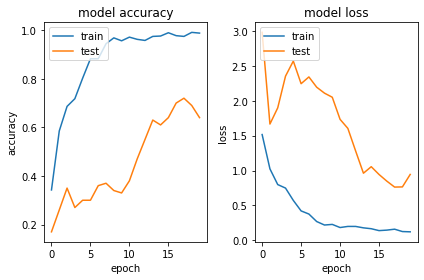

In [ ]:
plot_loss_accuracy(model3D_6_output)

# **Model-7** with Conv3D
* conv3D_template_3
* frame size=15,
* image dimensions (120*120)
* kernal filters [16,32,64,128]
* dropout = 0.15
* epoch = 20
* batch size = 30

In [ ]:
num_frames = 15
img_idx = np.linspace(0, 29, num_frames , dtype=int)
num_epochs = 20
batch_size = 30
height=120
weight=120

model3D_7 = conv3D_template_3(num_frames=num_frames, height=height, weight=weight, drop_out =0.25, conv_kernal = (32, 64, 128, 256))

optimiser = gd.SGD(learning_rate=0.01)
model3D_7.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model3D_7.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_14 (Conv3D)          (None, 15, 120, 120, 32)  2624      
                                                                 
 conv3d_15 (Conv3D)          (None, 15, 120, 120, 64)  55360     
                                                                 
 batch_normalization_11 (Bat  (None, 15, 120, 120, 64)  256      
 chNormalization)                                                
                                                                 
 max_pooling3d_11 (MaxPoolin  (None, 7, 60, 60, 64)    0         
 g3D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 7, 60, 60, 64)     0         
                                                                 
 conv3d_16 (Conv3D)          (None, 7, 60, 60, 128)   

In [ ]:
train_generator = generator(train_path, train_doc, batch_size,img_idx,height=height,weight=weight)
val_generator = generator(val_path, val_doc, batch_size,img_idx,height=height,weight=weight)

callbacks_list = model_callbacks('model3D_7')
steps_per_epoch,validation_steps = model_step(batch_size,num_train_sequences, num_val_sequences)

model3D_7_output = model3D_7.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                   callbacks=callbacks_list, validation_data=val_generator,
                   validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/datasets/Project_data/train ; batch size = 30
Epoch 1/20


2023-11-07 12:33:47.054490: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


23/23 [==============================] - ETA: 0s - loss: 1.3614 - categorical_accuracy: 0.4540Source path =  /home/datasets/Project_data/val ; batch size = 30

Epoch 00001: saving model to model3D_7_2023-11-0712_17_29.191659/model-00001-1.36137-0.45400-1.83180-0.18000.h5
23/23 [==============================] - 99s 4s/step - loss: 1.3614 - categorical_accuracy: 0.4540 - val_loss: 1.8318 - val_categorical_accuracy: 0.1800 - lr: 0.0100
Epoch 2/20
23/23 [==============================] - ETA: 0s - loss: 0.9364 - categorical_accuracy: 0.6335
Epoch 00002: saving model to model3D_7_2023-11-0712_17_29.191659/model-00002-0.93642-0.63348-2.90909-0.25000.h5
23/23 [==============================] - 83s 4s/step - loss: 0.9364 - categorical_accuracy: 0.6335 - val_loss: 2.9091 - val_categorical_accuracy: 0.2500 - lr: 0.0100
Epoch 3/20
23/23 [==============================] - ETA: 0s - loss: 0.6951 - categorical_accuracy: 0.7587
Epoch 00003: saving model to model3D_7_2023-11-0712_17_29.191659/model-0

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


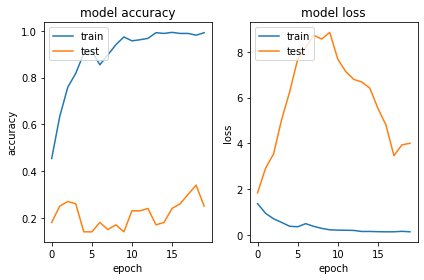

In [ ]:
plot_loss_accuracy(model3D_7_output)

# **Model-8** with Conv3D
* frame size=25,
* image dimensions (100*100)
* kernal filters [16,32,64,128]
* dropout = 0.15
* epoch = 20
* batch size = 50

In [ ]:
num_frames = 25
img_idx = np.linspace(0, 29, num_frames , dtype=int)
num_epochs = 20
batch_size = 50
height=100
weight=100

model3D_8 = conv3D_template_3(num_frames=num_frames, height=height, weight=weight, drop_out =0.15, conv_kernal = (16,32,64,128))

optimiser = gd.SGD(learning_rate=0.01)
model3D_8.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print (model3D_8.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 25, 100, 100, 16)  1312      
                                                                 
 conv3d_1 (Conv3D)           (None, 25, 100, 100, 32)  13856     
                                                                 
 batch_normalization (BatchN  (None, 25, 100, 100, 32)  128      
 ormalization)                                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 12, 50, 50, 32)   0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 50, 50, 32)    0         
                                                                 
 conv3d_2 (Conv3D)           (None, 12, 50, 50, 64)    5

2023-11-07 13:16:19.870657: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-11-07 13:16:19.870717: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14802 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:1e:00.0, compute capability: 7.5


In [ ]:
train_generator = generator(train_path, train_doc, batch_size,img_idx,height=height,weight=weight)
val_generator = generator(val_path, val_doc, batch_size,img_idx,height=height,weight=weight)

callbacks_list = model_callbacks('model3D_8')
steps_per_epoch,validation_steps = model_step(batch_size,num_train_sequences, num_val_sequences)

model3D_8_output = model3D_8.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                   callbacks=callbacks_list, validation_data=val_generator,
                   validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/datasets/Project_data/train ; batch size = 50
Epoch 1/20


2023-11-07 13:17:05.922150: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


14/14 [==============================] - ETA: 0s - loss: 1.4672 - categorical_accuracy: 0.4465Source path =  /home/datasets/Project_data/val ; batch size = 50

Epoch 00001: saving model to model3D_8_2023-11-0713_14_40.851722/model-00001-1.46723-0.44646-1.63211-0.25000.h5
14/14 [==============================] - 135s 10s/step - loss: 1.4672 - categorical_accuracy: 0.4465 - val_loss: 1.6321 - val_categorical_accuracy: 0.2500 - lr: 0.0100
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss: 0.7243 - categorical_accuracy: 0.7300
Epoch 00002: saving model to model3D_8_2023-11-0713_14_40.851722/model-00002-0.72428-0.73002-2.09922-0.23000.h5
14/14 [==============================] - 133s 10s/step - loss: 0.7243 - categorical_accuracy: 0.7300 - val_loss: 2.0992 - val_categorical_accuracy: 0.2300 - lr: 0.0100
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 0.4122 - categorical_accuracy: 0.8944
Epoch 00003: saving model to model3D_8_2023-11-0713_14_40.851722/mod

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


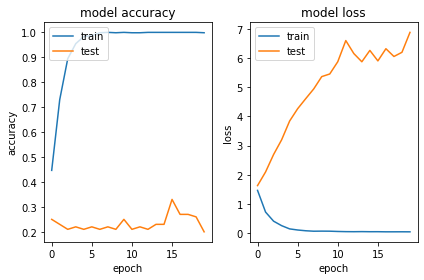

In [ ]:
plot_loss_accuracy(model3D_8_output)

# **Model 2D Convolution and RNN**

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, LSTM, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers
from keras.applications import resnet
from keras.applications.vgg16 import VGG16
import warnings
warnings.filterwarnings('ignore')

In [ ]:
res_model = resnet.ResNet50(weights='imagenet', include_top=False)
len(res_model.layers)

2023-11-08 08:28:27.125321: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-11-08 08:28:27.125388: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 36344 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:3e:00.0, compute capability: 8.6


94781440/94765736 [==============================] - 6s 0us/step


175

In [ ]:
def resNet_RNN_template_1(train_resnet=False, num_frames=20, height=100, width=100, gru = False, gru_units=256, dense_units = 128,drop_out=0.15):

  res_model = resnet.ResNet50(weights='imagenet', include_top=False)

  if(train_resnet):
    split_at = 150
    for layer in res_model.layers[:split_at]:
      layer.trainable = False
    for layer in res_model.layers[split_at:]:
      layer.trainable = True

  model = Sequential()
  model.add(TimeDistributed(res_model,input_shape=(num_frames, height, width, 3)))
  model.add(TimeDistributed(BatchNormalization()))
  model.add(TimeDistributed(MaxPooling2D((2, 2))))

  model.add(TimeDistributed(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')))
  model.add(TimeDistributed(BatchNormalization()))

  model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')))
  model.add(TimeDistributed(BatchNormalization()))
  model.add(TimeDistributed(MaxPooling2D((2, 2))))


  model.add(TimeDistributed(Flatten()))

  if (gru):
      model.add(GRU(gru_units))
  else:
      model.add(LSTM(gru_units))
  model.add(Dropout(drop_out))
  model.add(Dense(dense_units, activation='relu'))
  model.add(Dropout(drop_out))
  model.add(Dense(5, activation='softmax'))
  return model

In [ ]:
def resNet_RNN_template_2(train_resnet=False, num_frames=20, height=100, width=100, gru = False, gru_units=256, dense_units = 128,drop_out=0.15):

  res_model = resnet.ResNet50(weights='imagenet', include_top=False)

  if(train_resnet):
    split_at = 150
    for layer in res_model.layers[:split_at]:
      layer.trainable = False
    for layer in res_model.layers[split_at:]:
      layer.trainable = True

  model = Sequential()
  model.add(TimeDistributed(res_model,input_shape=(num_frames, height, width, 3)))
  model.add(TimeDistributed(BatchNormalization()))
  model.add(TimeDistributed(MaxPooling2D((2, 2))))

  model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')))
  model.add(TimeDistributed(BatchNormalization()))
  model.add(TimeDistributed(MaxPooling2D((2, 2))))


  model.add(TimeDistributed(Flatten()))

  if (gru):
      model.add(GRU(gru_units))
  else:
      model.add(LSTM(gru_units))
  model.add(Dropout(drop_out))
  model.add(Dense(dense_units, activation='relu'))
  model.add(Dropout(drop_out))
  model.add(Dense(5, activation='softmax'))
  return model

In [ ]:
def resNet_RNN_template_3(train_resnet=False, num_frames=20, height=100, width=100, gru = False, gru_units=256, dense_units = 128,drop_out=0.15):

  res_model = resnet.ResNet50(weights='imagenet', include_top=False)

  if(train_resnet):
    split_at = 150
    for layer in res_model.layers[:split_at]:
      layer.trainable = False
    for layer in res_model.layers[split_at:]:
      layer.trainable = True

  model = Sequential()
  model.add(TimeDistributed(res_model,input_shape=(num_frames, height, width, 3)))
  model.add(TimeDistributed(BatchNormalization()))
  model.add(TimeDistributed(MaxPooling2D((2, 2))))

  model.add(TimeDistributed(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')))
  model.add(TimeDistributed(BatchNormalization()))
  model.add(TimeDistributed(MaxPooling2D((2, 2))))


  model.add(TimeDistributed(Flatten()))

  if (gru):
      model.add(GRU(gru_units))
  else:
      model.add(LSTM(gru_units))
  model.add(Dropout(drop_out))
  model.add(Dense(dense_units, activation='relu'))
  model.add(Dropout(drop_out))
  model.add(Dense(5, activation='softmax'))
  return model

In [ ]:
def vggNet_RNN_template_4(train_vggnet=False, num_frames=20, height=100, width=100, gru = False, gru_units=256, dense_units = 128,drop_out=0.15):

  vgg_model = VGG16(weights='imagenet', include_top=False)

  if(train_vggnet):
    split_at = 150
    for layer in vgg_model.layers[:split_at]:
      layer.trainable = False
    for layer in vgg_model.layers[split_at:]:
      layer.trainable = True

  model = Sequential()
  model.add(TimeDistributed(vgg_model,input_shape=(num_frames, height, width, 3)))
  model.add(TimeDistributed(BatchNormalization()))

  model.add(TimeDistributed(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')))
  model.add(TimeDistributed(BatchNormalization()))
  model.add(TimeDistributed(MaxPooling2D((2, 2))))


  model.add(TimeDistributed(Flatten()))

  if (gru):
      model.add(GRU(gru_units))
  else:
      model.add(LSTM(gru_units))
  model.add(Dropout(drop_out))
  model.add(Dense(dense_units, activation='relu'))
  model.add(Dropout(drop_out))
  model.add(Dense(5, activation='softmax'))
  return model

# **Model 2D Convolution and RNN - transfer_model_1**
 * resNet_RNN_template_1
 * frame size=15
 * gru - True
 * gru units - 256
 * dense units - 128
 * image dimensions = (100*100)  
 * ResNet training = False
 * dropout = 0.15
 * epoch = 30
 * batch size = 50

In [ ]:
num_frames = 15
img_idx = np.linspace(0, 29, num_frames , dtype=int)
num_epochs = 30
batch_size = 50
height=100
width=100

transfer_model_1 = resNet_RNN_template_1(False, num_frames, height, width, gru = True, gru_units=256, dense_units = 128,drop_out=0.15)
transfer_model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
transfer_model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_25 (TimeDi  (None, 15, 4, 4, 2048)   23587712  
 stributed)                                                      
                                                                 
 time_distributed_26 (TimeDi  (None, 15, 4, 4, 2048)   8192      
 stributed)                                                      
                                                                 
 time_distributed_27 (TimeDi  (None, 15, 2, 2, 2048)   0         
 stributed)                                                      
                                                                 
 time_distributed_28 (TimeDi  (None, 15, 2, 2, 32)     589856    
 stributed)                                                      
                                                                 
 time_distributed_29 (TimeDi  (None, 15, 2, 2, 32)    

In [ ]:
train_generator = generator(train_path, train_doc, batch_size,img_idx,height,width)
val_generator = generator(val_path, val_doc, batch_size,img_idx,height,width)

callbacks_list = model_callbacks('transfer_model_1')
steps_per_epoch,validation_steps = model_step(batch_size,num_train_sequences, num_val_sequences)

transfer_model_1 = transfer_model_1.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                   callbacks=callbacks_list, validation_data=val_generator,
                   validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/datasets/Project_data/train ; batch size = 50
Epoch 1/30


2023-11-07 14:29:21.560174: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302
2023-11-07 14:29:24.522659: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-11-07 14:29:24.522714: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-11-07 14:29:24.522738: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory

14/14 [==============================] - ETA: 0s - loss: 0.9800 - categorical_accuracy: 0.6214Source path =  /home/datasets/Project_data/val ; batch size = 50

Epoch 00001: saving model to transfer_model_1_2023-11-0714_07_52.423073/model-00001-0.98003-0.62142-2.83308-0.18000.h5
14/14 [==============================] - 98s 6s/step - loss: 0.9800 - categorical_accuracy: 0.6214 - val_loss: 2.8331 - val_categorical_accuracy: 0.1800 - lr: 0.0010
Epoch 2/30
14/14 [==============================] - ETA: 0s - loss: 0.3390 - categorical_accuracy: 0.8914
Epoch 00002: saving model to transfer_model_1_2023-11-0714_07_52.423073/model-00002-0.33904-0.89140-8.39228-0.20000.h5
14/14 [==============================] - 81s 6s/step - loss: 0.3390 - categorical_accuracy: 0.8914 - val_loss: 8.3923 - val_categorical_accuracy: 0.2000 - lr: 0.0010
Epoch 3/30
14/14 [==============================] - ETA: 0s - loss: 0.2374 - categorical_accuracy: 0.9351
Epoch 00003: saving model to transfer_model_1_2023-11-0714

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


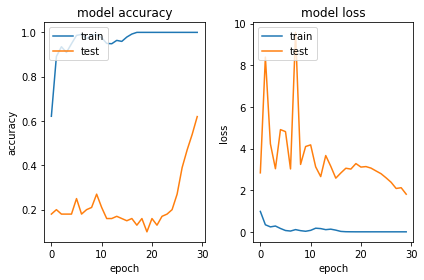

In [ ]:
plot_loss_accuracy(transfer_model_1)

# **Model 2D Convolution and RNN - transfer_model_2**
 * resNet_RNN_template_1
 * frame size=15
 * gru - True
 * gru units - 256
 * dense units - 128
 * image dimensions = (100*100)  
 * ResNet training = True
 * dropout = 0.15
 * epoch = 30
 * batch size = 30

In [ ]:
num_frames = 15
img_idx = np.linspace(0, 29, num_frames , dtype=int)
num_epochs = 30
batch_size = 30
height=100
width=100
resnet_train = True

transfer_model_2 = resNet_RNN_template_1(resnet_train, num_frames, height, width, gru = True, gru_units=256, dense_units = 128,drop_out=0.15)
transfer_model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
transfer_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_9 (TimeDis  (None, 15, 4, 4, 2048)   23587712  
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, 15, 4, 4, 2048)   8192      
 stributed)                                                      
                                                                 
 time_distributed_11 (TimeDi  (None, 15, 2, 2, 2048)   0         
 stributed)                                                      
                                                                 
 time_distributed_12 (TimeDi  (None, 15, 2, 2, 32)     589856    
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 15, 2, 2, 32)    

In [ ]:
train_generator = generator(train_path, train_doc, batch_size,img_idx,height,width)
val_generator = generator(val_path, val_doc, batch_size,img_idx,height,width)

callbacks_list = model_callbacks('transfer_model_2')
steps_per_epoch,validation_steps = model_step(batch_size,num_train_sequences, num_val_sequences)

transfer_model_2 = transfer_model_2.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                   callbacks=callbacks_list, validation_data=val_generator,
                   validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/datasets/Project_data/train ; batch size = 30
Epoch 1/30


2023-11-07 15:37:22.310151: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


23/23 [==============================] - ETA: 0s - loss: 1.5404 - categorical_accuracy: 0.2866Source path =  /home/datasets/Project_data/val ; batch size = 30

Epoch 00001: saving model to transfer_model_2_2023-11-0715_35_50.835785/model-00001-1.54038-0.28658-2.05448-0.22000.h5
23/23 [==============================] - 93s 4s/step - loss: 1.5404 - categorical_accuracy: 0.2866 - val_loss: 2.0545 - val_categorical_accuracy: 0.2200 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - ETA: 0s - loss: 1.4091 - categorical_accuracy: 0.3484
Epoch 00002: saving model to transfer_model_2_2023-11-0715_35_50.835785/model-00002-1.40908-0.34842-1.85391-0.22000.h5
23/23 [==============================] - 77s 3s/step - loss: 1.4091 - categorical_accuracy: 0.3484 - val_loss: 1.8539 - val_categorical_accuracy: 0.2200 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - ETA: 0s - loss: 1.3485 - categorical_accuracy: 0.3937
Epoch 00003: saving model to transfer_model_2_2023-11-0715

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


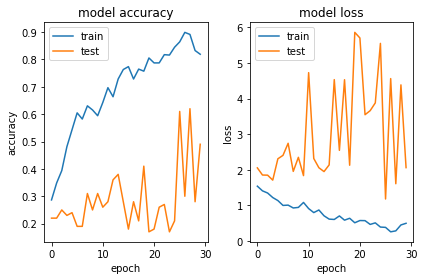

In [ ]:
plot_loss_accuracy(transfer_model_2)

# **Model 2D Convolution and RNN - transfer_model_3**
 * resNet_RNN_template_2
 * frame size=15
 * gru - True
 * gru units - 256
 * dense units - 128
 * image dimensions = (100*100)  
 * ResNet training = False
 * dropout = 0.15
 * epoch = 30
 * batch size = 30

In [ ]:
num_frames = 15
img_idx = np.linspace(0, 29, num_frames , dtype=int)
num_epochs = 30
batch_size = 30
height=100
width=100
resnet_train = False

transfer_model_3 = resNet_RNN_template_2(resnet_train, num_frames, height, width, gru = True, gru_units=256, dense_units = 128,drop_out=0.15)
transfer_model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
transfer_model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 15, 4, 4, 2048)   23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 15, 4, 4, 2048)   8192      
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 15, 2, 2, 2048)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 15, 2, 2, 64)     1179712   
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 15, 2, 2, 64)     2

In [ ]:
train_generator = generator(train_path, train_doc, batch_size,img_idx,height,width)
val_generator = generator(val_path, val_doc, batch_size,img_idx,height,width)

callbacks_list = model_callbacks('transfer_model_3')
steps_per_epoch,validation_steps = model_step(batch_size,num_train_sequences, num_val_sequences)

transfer_model_3 = transfer_model_3.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                   callbacks=callbacks_list, validation_data=val_generator,
                   validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/datasets/Project_data/train ; batch size = 30
Epoch 1/30


2023-11-07 17:52:12.609662: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


23/23 [==============================] - ETA: 0s - loss: 0.7750 - categorical_accuracy: 0.7059Source path =  /home/datasets/Project_data/val ; batch size = 30

Epoch 00001: saving model to transfer_model_3_2023-11-0717_49_39.482878/model-00001-0.77496-0.70588-2.24112-0.21000.h5
23/23 [==============================] - 92s 4s/step - loss: 0.7750 - categorical_accuracy: 0.7059 - val_loss: 2.2411 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 2/30
23/23 [==============================] - ETA: 0s - loss: 0.4507 - categorical_accuracy: 0.8552
Epoch 00002: saving model to transfer_model_3_2023-11-0717_49_39.482878/model-00002-0.45069-0.85520-2.21264-0.15000.h5
23/23 [==============================] - 77s 3s/step - loss: 0.4507 - categorical_accuracy: 0.8552 - val_loss: 2.2126 - val_categorical_accuracy: 0.1500 - lr: 0.0010
Epoch 3/30
23/23 [==============================] - ETA: 0s - loss: 0.2104 - categorical_accuracy: 0.9336
Epoch 00003: saving model to transfer_model_3_2023-11-0717

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


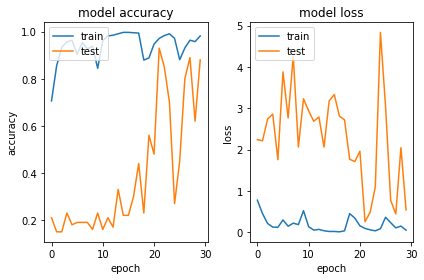

In [ ]:
plot_loss_accuracy(transfer_model_3)

# **Model 2D Convolution and RNN - transfer_model_4 -- FINAL MODEL**
 * resNet_RNN_template_3
 * frame size=10
 * gru - True
 * gru units - 256
 * dense units - 128
 * image dimensions = (120*120)  
 * ResNet training = False
 * dropout = 0.15
 * epoch = 30
 * batch size = 20

In [ ]:
num_frames = 10
img_idx = np.linspace(0, 29, num_frames , dtype=int)
num_epochs = 50
batch_size = 25
height=120
width=120
resnet_train = False

transfer_model_4 = resNet_RNN_template_3(resnet_train, num_frames, height, width, gru = True, gru_units=256, dense_units = 128,drop_out=0.15)
transfer_model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
transfer_model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 10, 4, 4, 2048)   23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 10, 4, 4, 2048)   8192      
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 10, 2, 2, 2048)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 10, 2, 2, 16)     294928    
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 10, 2, 2, 16)     6

In [ ]:
train_generator = generator(train_path, train_doc, batch_size,img_idx,height,width)
val_generator = generator(val_path, val_doc, batch_size,img_idx,height,width)

callbacks_list = model_callbacks('transfer_model_4')
steps_per_epoch,validation_steps = model_step(batch_size,num_train_sequences, num_val_sequences)

transfer_model_4 = transfer_model_4.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                   callbacks=callbacks_list, validation_data=val_generator,
                   validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/datasets/Project_data/train ; batch size = 25
Epoch 1/50


2023-11-07 20:59:41.055739: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


27/27 [==============================] - ETA: 0s - loss: 0.9587 - categorical_accuracy: 0.6214Source path =  /home/datasets/Project_data/val ; batch size = 25

Epoch 00001: saving model to transfer_model_4_2023-11-0720_57_54.825566/model-00001-0.95868-0.62142-2.76309-0.23000.h5
27/27 [==============================] - 68s 2s/step - loss: 0.9587 - categorical_accuracy: 0.6214 - val_loss: 2.7631 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 2/50
27/27 [==============================] - ETA: 0s - loss: 0.5001 - categorical_accuracy: 0.8205
Epoch 00002: saving model to transfer_model_4_2023-11-0720_57_54.825566/model-00002-0.50014-0.82051-5.15291-0.21000.h5
27/27 [==============================] - 54s 2s/step - loss: 0.5001 - categorical_accuracy: 0.8205 - val_loss: 5.1529 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 3/50
27/27 [==============================] - ETA: 0s - loss: 0.2975 - categorical_accuracy: 0.9020
Epoch 00003: saving model to transfer_model_4_2023-11-0720

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


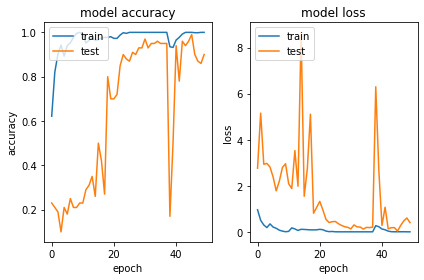

In [ ]:
plot_loss_accuracy(transfer_model_4)

# **Model 2D Convolution and RNN - transfer_model_5**
 * resNet_RNN_template_3
 * frame size=10
 * gru - True
 * gru units - 256
 * dense units - 128
 * image dimensions = (120*120)  
 * ResNet training = True
 * dropout = 0.15
 * epoch = 30
 * batch size = 20

In [ ]:
num_frames = 10
img_idx = np.linspace(0, 29, num_frames , dtype=int)
num_epochs = 50
batch_size = 25
height=120
width=120
resnet_train = True

transfer_model_5 = resNet_RNN_template_3(resnet_train, num_frames, height, width, gru = True, gru_units=256, dense_units = 128,drop_out=0.15)
transfer_model_5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
transfer_model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 10, 4, 4, 2048)   23587712  
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 10, 4, 4, 2048)   8192      
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 10, 2, 2, 2048)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 10, 2, 2, 16)     294928    
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 10, 2, 2, 16)     6

In [ ]:
train_generator = generator(train_path, train_doc, batch_size,img_idx,height,width)
val_generator = generator(val_path, val_doc, batch_size,img_idx,height,width)

callbacks_list = model_callbacks('transfer_model_5')
steps_per_epoch,validation_steps = model_step(batch_size,num_train_sequences, num_val_sequences)

transfer_model_5 = transfer_model_5.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                   callbacks=callbacks_list, validation_data=val_generator,
                   validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/datasets/Project_data/train ; batch size = 25
Epoch 1/50


2023-11-07 19:54:05.666632: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


27/27 [==============================] - ETA: 0s - loss: 1.5003 - categorical_accuracy: 0.3107Source path =  /home/datasets/Project_data/val ; batch size = 25

Epoch 00001: saving model to transfer_model_5_2023-11-0719_52_49.006748/model-00001-1.50033-0.31071-1.47637-0.27000.h5
27/27 [==============================] - 62s 2s/step - loss: 1.5003 - categorical_accuracy: 0.3107 - val_loss: 1.4764 - val_categorical_accuracy: 0.2700 - lr: 0.0010
Epoch 2/50
27/27 [==============================] - ETA: 0s - loss: 1.3706 - categorical_accuracy: 0.3891
Epoch 00002: saving model to transfer_model_5_2023-11-0719_52_49.006748/model-00002-1.37065-0.38914-1.54766-0.29000.h5
27/27 [==============================] - 54s 2s/step - loss: 1.3706 - categorical_accuracy: 0.3891 - val_loss: 1.5477 - val_categorical_accuracy: 0.2900 - lr: 0.0010
Epoch 3/50
27/27 [==============================] - ETA: 0s - loss: 1.2552 - categorical_accuracy: 0.4434
Epoch 00003: saving model to transfer_model_5_2023-11-0719

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


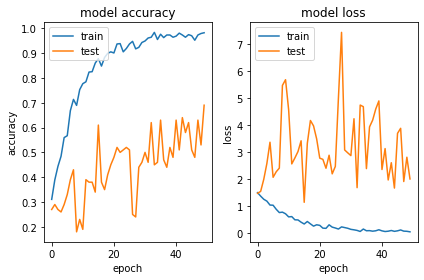

In [ ]:
plot_loss_accuracy(transfer_model_5)

# **Model 2D Convolution and RNN - transfer_model_6**
 * vggNet_RNN_template_4
 * frame size=10
 * gru - True
 * gru units - 256
 * dense units - 128
 * image dimensions = (120*120)  
 * vggNet training = False
 * dropout = 0.15
 * epoch = 30
 * batch size = 20

In [ ]:
num_frames = 10
img_idx = np.linspace(0, 29, num_frames , dtype=int)
num_epochs = 50
batch_size = 25
height=120
width=120
vggnet_train = False

transfer_model_6 = vggNet_RNN_template_4(vggnet_train, num_frames, height, width, gru = True, gru_units=256, dense_units = 128,drop_out=0.15)
transfer_model_6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
transfer_model_6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_6 (TimeDis  (None, 10, 3, 3, 512)    14714688  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 10, 3, 3, 512)    2048      
 tributed)                                                       
                                                                 
 time_distributed_8 (TimeDis  (None, 10, 3, 3, 16)     73744     
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 10, 3, 3, 16)     64        
 tributed)                                                       
                                                                 
 time_distributed_10 (TimeDi  (None, 10, 1, 1, 16)    

In [ ]:
train_generator = generator(train_path, train_doc, batch_size,img_idx,height,width)
val_generator = generator(val_path, val_doc, batch_size,img_idx,height,width)

callbacks_list = model_callbacks('transfer_model_6')
steps_per_epoch,validation_steps = model_step(batch_size,num_train_sequences, num_val_sequences)

transfer_model_6 = transfer_model_6.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,
                   callbacks=callbacks_list, validation_data=val_generator,
                   validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

Source path =  /home/datasets/Project_data/train ; batch size = 25
Epoch 1/50


2023-11-08 08:37:17.309076: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302
2023-11-08 08:37:20.615920: I tensorflow/stream_executor/cuda/cuda_blas.cc:1792] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


27/27 [==============================] - ETA: 0s - loss: 1.4609 - categorical_accuracy: 0.3228Source path =  /home/datasets/Project_data/val ; batch size = 25

Epoch 00001: saving model to transfer_model_6_2023-11-0808_25_26.689722/model-00001-1.46087-0.32278-1.71547-0.19000.h5
27/27 [==============================] - 101s 4s/step - loss: 1.4609 - categorical_accuracy: 0.3228 - val_loss: 1.7155 - val_categorical_accuracy: 0.1900 - lr: 0.0010
Epoch 2/50
27/27 [==============================] - ETA: 0s - loss: 1.2769 - categorical_accuracy: 0.4178
Epoch 00002: saving model to transfer_model_6_2023-11-0808_25_26.689722/model-00002-1.27689-0.41780-2.88636-0.21000.h5
27/27 [==============================] - 68s 3s/step - loss: 1.2769 - categorical_accuracy: 0.4178 - val_loss: 2.8864 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 3/50
27/27 [==============================] - ETA: 0s - loss: 1.1955 - categorical_accuracy: 0.4630
Epoch 00003: saving model to transfer_model_6_2023-11-080

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])


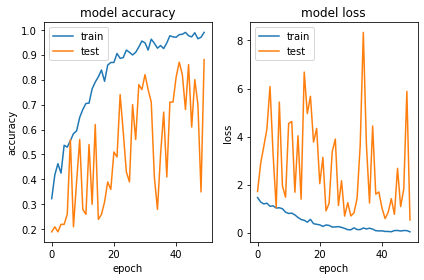

In [ ]:
plot_loss_accuracy(transfer_model_6)